In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

sys.path.insert(0, "~/home/")
# import warnings
# warnings.filterwarnings('ignore')

from michael import janet

In [2]:
uni = pd.read_csv("/Users/oliver.hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 1#uni[uni.source_id == int(48977371798954368)].index[0]

/Users/oliver.hall/Research/michael/Examples/../michael/janet.py:218: UserWarning: RUNNING ON TARGET 1, 2174289161681454720, tess-sip
  warnings.warn(f'RUNNING ON TARGET {index}, {df.loc[index, "source_id"]}, {pipeline}')


Target DR3 ID 2174289161681454720 has tesscut data available on MAST for Sectors 16, 17, 56, 57
Data already downloaded for Sector 16.
Data already downloaded for Sector 17.
Data already downloaded for Sector 56.
Data already downloaded for Sector 57.
Period range automatically set to 0.75x the length of the longest baseline.
For this target, this is 40.5 days.
### Running TESS-SIP on Sector 16-17 on star 2174289161681454720 ###


/Users/oliver.hall/Research/michael/Examples/../michael/janet.py:132: UserWarning: Your upper period limit is longer than half your longest set of consecutive TESS sectors. You'll be more prone to harmonics.
  warnings.warn(UserWarning("Your upper period limit is longer than half your "+
Running pixels in aperture: 100%|████████████████| 1/1 [00:00<00:00, 312.03it/s]


### Completed TESS SIP for Sector 16-17 on star 2174289161681454720 ###
### Running TESS-SIP on Sector 56-57 on star 2174289161681454720 ###


Running pixels in aperture: 100%|█████████████████| 1/1 [00:00<00:00, 77.49it/s]


### Completed TESS SIP for Sector 56-57 on star 2174289161681454720 ###


KeyError: 'SLS'

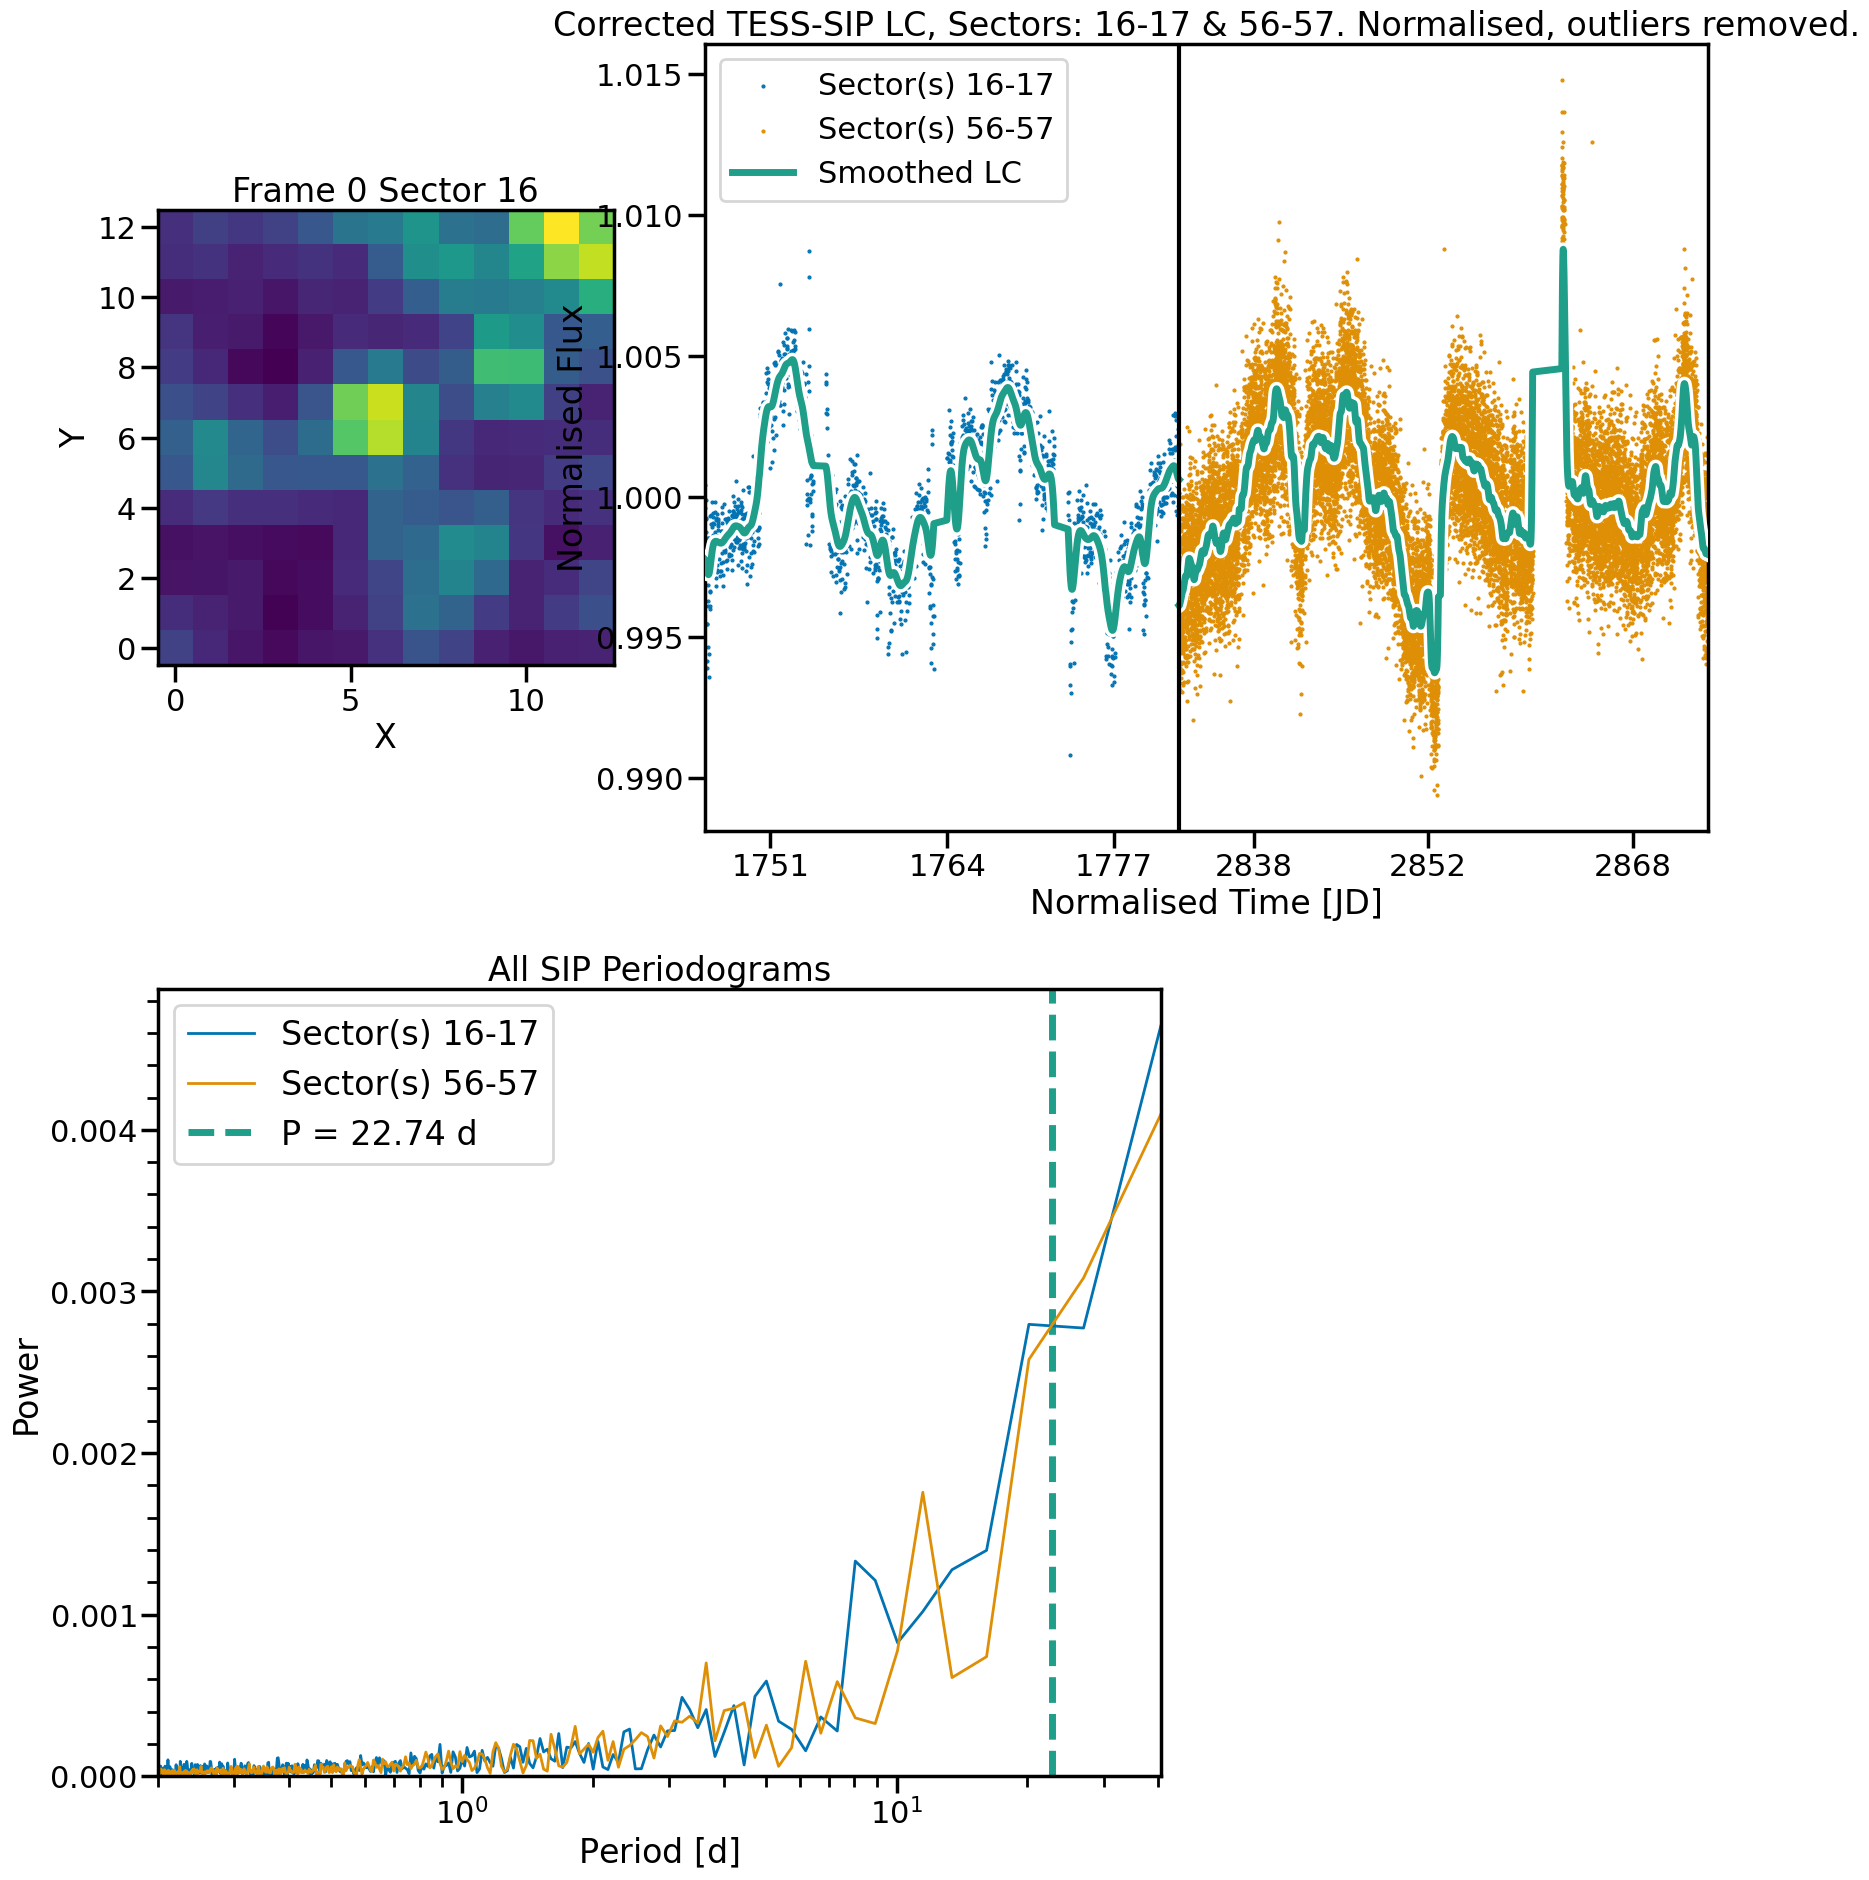

In [4]:
for method in ['tess-sip']:#'eleanor', 'eleanor-corner','eleanor-pca', 'unpopular','tess-sip', 'tess-sip-detrended']:
    j = janet.boot(uni, index=index, pipeline = method)
    j.prepare_data()
    j.get_rotation()
    j.validate_rotation()
    j.view()
    plt.show()

In [ ]:
from michael.plotting_SIP import plot_SIP
plot_SIP(j)

Let's have a look at the raw input flux, the corrected flux, and the periodograms of both.

In [ ]:
tpfs = j.void['tpfs_16-17']

In [ ]:
plt.imshow(tpfs[0][0][0].flux.value)

In [ ]:
from scipy.signal import find_peaks
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from tess_sip import SIP
from lightkurve import periodogram

In [ ]:
j.results

In [ ]:
r = SIP(tpfs, periods = [23.208273])


In [ ]:
r['corr_lc'].fold(period=23.208273).plot()
plt.show()

In [ ]:
SIP

In [ ]:
SIP